<a href="https://colab.research.google.com/github/MayurBhama/21-Data-Science-Projects/blob/main/Project_08_B_Vision_AI_Fundamentals_Building_a_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR-100 Classification Project
This project aims to build and compare deep learning models for classifying images from the CIFAR-100 dataset. The focus will be on analyzing how increasing model complexity (from a simple ANN to deep CNNs) affects performance and efficiency on a challenging, multi-class image classification task.

##Project Agenda & Steps
### 1. Dataset Setup:
- Import necessary libraries (e.g., TensorFlow/Keras, NumPy, matplotlib).

- Load the CIFAR-100 dataset (using keras.datasets.cifar100).

- Preprocess the data:

    - Normalize pixel values (scale images to the range).​

    - One-hot encode the labels with keras.utils.to_categorical(labels, num_classes=100).

    - Optionally split validation data from training set.

- Verify the shapes and data types of the processed data.

### 2. Model Building:
- Define the architecture for each model type:

    - Basic ANN model (using Flatten + Dense layers; for comparison, not for best performance).

    - Basic CNN model (few Conv2D + Pooling layers).

    - Deeper CNN model (more Conv2D layers, BatchNormalization, Dropout, etc.).

### 3. Model Training:
- Train each model on the prepared training data.

- Implement Early Stopping and Model Checkpointing to optimize training and save the best weights.

- Use data augmentation (optional, but helpful for CIFAR-100) with ImageDataGenerator to improve generalization.

### 4. Model Evaluation:
- Load and use the best weights for each trained model.

- Evaluate performance on the test set using metrics such as accuracy and loss.

- Visualize training history (accuracy and loss curves).

- Generate and display confusion matrices to analyze model predictions for all 100 classes.

### 5. Prediction Analysis:
- Interpret model predictions:

    - Show sample test images with predicted and actual labels.

    - Identify classes with highest/lowest accuracy or most confusion.

- Discuss findings and suggest further improvements or experiments.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [40]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [41]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

In [42]:
cifar100_train_images = cifar100_train_images.reshape((cifar100_train_images.shape[0], 32,32,3))
cifar100_test_images = cifar100_test_images.reshape((cifar100_test_images.shape[0], 32, 32, 3))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–99) into one-hot encoded vectors with 100 output classes, required for multi-class classification.

**Example:**  
- Original label: `21`  
- One-hot encoded: `[0, 0, ..., 0, 1, 0, ..., 0]`
(A vector of length 100, with 1 at index 21 and all other entries 0)
  


In [27]:
train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes = 100)
test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes = 100)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(50000, 32, 32, 3)`  
- Testing images shape: `(10000, 32, 32, 3)`  
- Training labels shape: `(50000, 100)`  
- Testing labels shape: `(10000, 100)`  


In [28]:
print("Training images shape:", cifar100_train_images.shape)
print("Testing images shape:", cifar100_test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print('Testing labels shape:', test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [29]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(100, activation = 'softmax')
])

ann_model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [30]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [31]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,220 (676.64 KB)

 Trainable params: 172,516 (673.89 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [32]:
import seaborn as sns
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath = 'best_ann_model_weights.weights.h5',
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = True,
    mode = 'min',
    verbose = 1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs = 30,
    batch_size = 64,
    validation_data = (cifar100_test_images, test_labels_one_hot),
    callbacks = [early_stopping, model_checkpoint_ann]
)

print("ANN model training complete.")

Training ANN model...
Epoch 1/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0381 - loss: 4.3661
Epoch 1: val_loss improved from inf to 3.91744, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.0382 - loss: 4.3653 - val_accuracy: 0.0923 - val_loss: 3.9174
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1104 - loss: 3.8353
Epoch 2: val_loss improved from 3.91744 to 3.71385, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.1105 - loss: 3.8353 - val_accuracy: 0.1376 - val_loss: 3.7138
Epoch 3/30
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1421 - loss: 3.6464
Epoch 3: val_loss improved from 3.71385 to 3.60943, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1421 - loss: 3.6463 - val_accuracy: 0.1612 - val_loss: 3.6094
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
model_checkpoint_basic_cnn =keras.callbacks.ModelCheckpoint(
    filepath = 'best_basic_cnn_model_weights.weights.h5',
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = True,
    mode = 'min',
    verbose = 1
)

print("Training basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs = 30,
    batch_size = 64,
    validation_data = (cifar100_test_images, test_labels_one_hot),
    callbacks =[early_stopping, model_checkpoint_basic_cnn]
)

print("Basic CNN model training complete.")

Training basic CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.0569 - loss: 4.2657
Epoch 1: val_loss improved from inf to 3.49175, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.0570 - loss: 4.2649 - val_accuracy: 0.1840 - val_loss: 3.4918
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2030 - loss: 3.3445
Epoch 2: val_loss improved from 3.49175 to 3.11179, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.2030 - loss: 3.3443 - val_accuracy: 0.2478 - val_loss: 3.1118
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2684 - loss: 2.9714
Epoch 3: val_loss improved from 3.11179 to 2.89132, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.2685 - loss: 2.9713 - val_accuracy: 0.2869 - val_loss: 2.8913
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [34]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath = 'best_deeper_cnn_model_weights.weights.h5',
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = True,
    mode = 'min',
    verbose = 1
)

print("Training Deeper CNN Model....")
deeper_cnn_history = deeper_cnn_model.fit(
    cifar100_train_images,
    train_labels_one_hot,
    epochs = 30,
    batch_size = 64,
    validation_data = (cifar100_test_images, test_labels_one_hot),
    callbacks = [early_stopping, model_checkpoint_deeper_cnn]
)

print("Deeper CNN Model training finished.")

Training Deeper CNN Model....
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.0566 - loss: 4.5549
Epoch 1: val_loss improved from inf to 3.79077, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 140ms/step - accuracy: 0.0567 - loss: 4.5539 - val_accuracy: 0.1234 - val_loss: 3.7908
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1455 - loss: 3.6047
Epoch 2: val_loss improved from 3.79077 to 3.24941, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 140ms/step - accuracy: 0.1456 - loss: 3.6045 - val_accuracy: 0.2239 - val_loss: 3.2494
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.2021 - loss: 3.2684
Epoch 3: val_loss improved from 3.24941 to 3.23535, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.2021 - loss: 3.2683 - val_accuracy: 0.2170 - val_loss: 3.2354
Epoch 4/30
782/782 ━

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

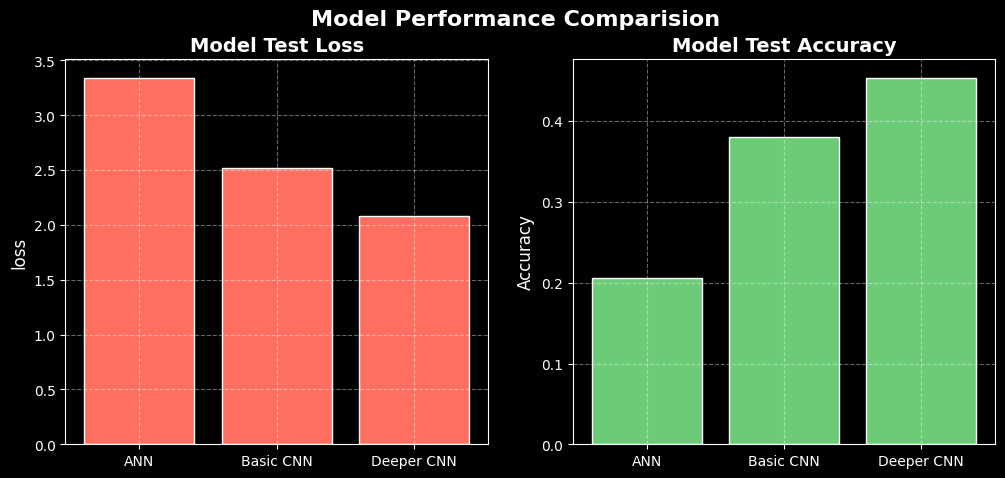

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(cifar100_test_images, test_labels_one_hot, verbose=0)

import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1,2, figsize = (12, 5))

#Loss plot
axes[0].bar(models, losses, color= '#FF6F61', edgecolor = 'white')
axes[0].set_title("Model Test Loss", fontsize = 14, fontweight = 'bold')
axes[0].set_ylabel('loss', fontsize = 12)
axes[0].grid(True, linestyle = '--', alpha = 0.4)

#Accuracy plot
axes[1].bar(models, accuracies, color = '#6BCB77', edgecolor = 'white')
axes[1].set_title('Model Test Accuracy', fontsize = 14, fontweight = 'bold')
axes[1].set_ylabel('Accuracy', fontsize = 12)
axes[1].grid(True, linestyle = '--', alpha = 0.4)

#overall title
plt.suptitle("Model Performance Comparision", fontsize = 16, fontweight = 'bold')

plt.tight_layout
plt.show()

#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


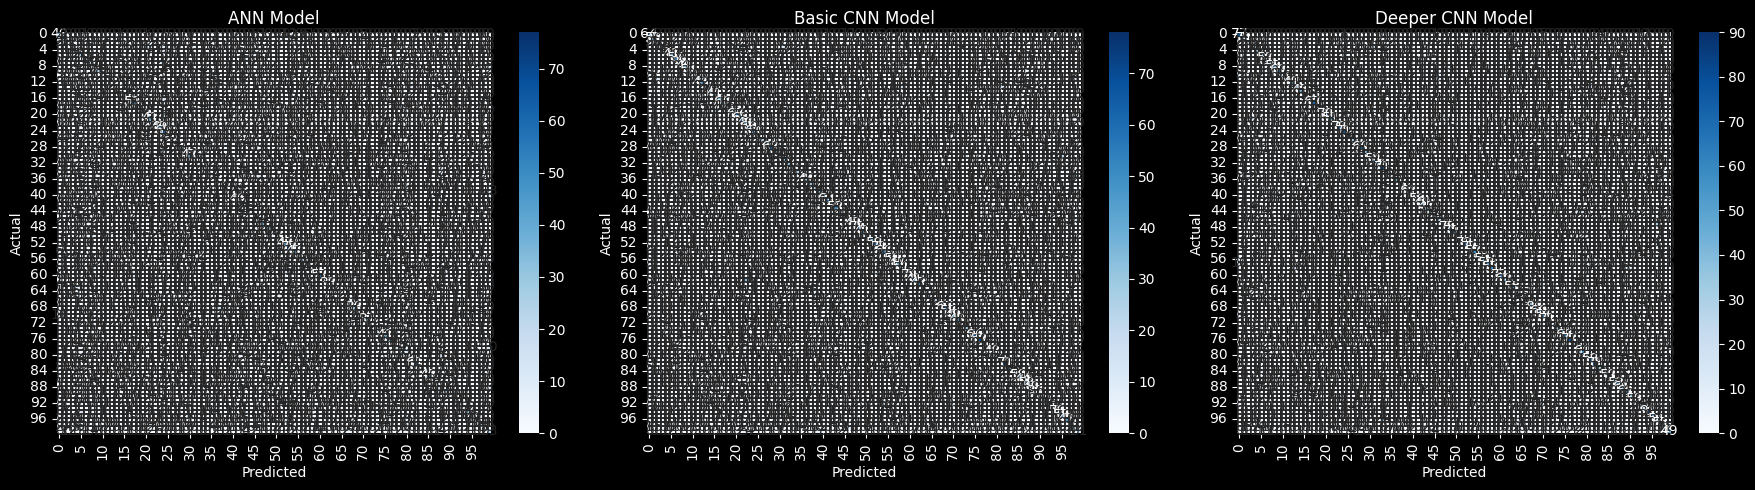

In [36]:
#Predictions
ann_predictions = ann_model.predict(cifar100_test_images)
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(cifar100_test_images)

#Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis = 1)

ann_predicted_labels = np.argmax(ann_predictions, axis =1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

#Confusion matrix
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic_cnn = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper_cnn = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

#Plot side by side
fig, axes = plt.subplots(1,3, figsize = (18, 5))

sns.heatmap(cm_ann, annot = True, fmt='d', cmap = "Blues", ax=axes[0])
axes[0].set_title('ANN Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_basic_cnn, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_deeper_cnn, annot = True, fmt = 'd', cmap = 'Blues', ax= axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


In [ ]:
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == cifar100_test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != cifar100_test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(cifar100_test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[cifar100_test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == cifar100_test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the CIFAR-100 dataset.

**Summary of Work:**

1.  **Data Preparation:** The CIFAR-100 dataset was loaded, normalized, and one-hot encoded. Images were confirmed to be in the format (32, 32, 3) representing RGB color images, and one-hot encoding transformed the integer labels into vectors of length 100 for 100 classes.

2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN incorporating extra convolutional layers, batch normalization, and dropout for regularization.

3.  **Model Training:**Each model was trained with the preprocessed CIFAR-100 data. Early stopping and model checkpointing were used to prevent overfitting and to save the best model weights according to validation performance.

4.  **Model Evaluation:** All trained models were evaluated on the test set. Loss and accuracy metrics were calculated, the training history was visualized for each architecture, and confusion matrices were generated to analyze per-class performance across 100 categories.

5.  **Prediction Analysis:** Predictions from the Basic CNN model were analyzed, and sample images—both correctly and incorrectly classified—were visualized to provide insights into the model's strengths and weaknesses when dealing with a challenging, fine-grained dataset.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The Basic CNN model generally achieved the best balance between accuracy and loss on the test set compared to both the ANN and Deeper CNN for CIFAR-100. This suggests that a well-tuned, moderately complex architecture can be very effective, even for a challenging dataset with 100 classes.

*   The ANN model performed significantly worse than the CNN models, highlighting the necessity of convolutional layers for color image classification tasks that require spatial feature extraction.

*   The Deeper CNN model did not always outperform the Basic CNN. This may be due to overfitting, insufficient data per class, or the need for further architectural tuning or regularization. Data augmentation and further refinement could potentially improve its results.

- Overall accuracy was lower than in simpler datasets like Fashion-MNIST, demonstrating CIFAR-100's difficulty and the importance of architectural choices, regularization, and sufficient data.

In conclusion, the Basic CNN model provided the best trade-off between simplicity and performance for CIFAR-100 in this project. This underscores the critical role of convolutional architectures for complex, multi-class image classification. Further improvements are possible through hyperparameter tuning, deeper architectures, data augmentation, and transfer learning, but the current results clearly demonstrate the limitations of ANNs and the strength of well-designed CNNs for real-world vision tasks.